In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys
import normalize_data as nd

print(nd)
df = nd.getNormalizedDataset()

<module 'normalize_data' from '/Users/tomasnocetti/Documents/Facultad/OrgaDatos/tp1-zonajobs-analysis/normalize_data.py'>


In [36]:
# Se reliza una comparacion para ver que datos son no nulos. 
# Vemos que solamente las ammenities tienen valor, el resto puede variar.
~ df.isnull().any()

titulo                        False
descripcion                   False
tipodepropiedad                True
ciudad                         True
provincia                      True
antiguedad                     True
habitaciones                   True
garages                        True
banos                          True
metroscubiertos                True
metrostotales                  True
fecha                          True
gimnasio                       True
usosmultiples                  True
piscina                        True
escuelascercanas               True
centroscomercialescercanos     True
precio                         True
precio_dolar                   True
precio_m2                      True
extras                         True
dtype: bool

In [37]:
#Busquemos el valor del inmueble mas antiguo y del mas 
print(df['fecha'].min())
print(df['fecha'].max())

2012-01-01 00:00:00
2016-12-31 00:00:00


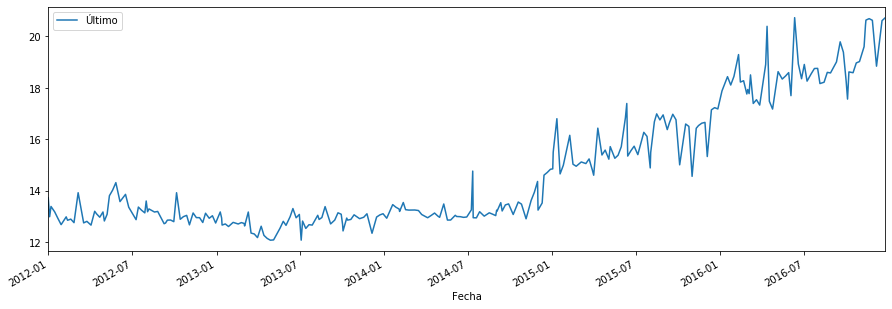

In [38]:
# Importamos un dataset del cambio de MX a Dolar
dfChangeRate = pd.read_csv('./extra_datasets/usd_mxc.csv', parse_dates=['Fecha'], dtype={'Último': float}, decimal=",")
dfChangeRate = dfChangeRate.drop(['Apertura', 'Máximo', 'Mínimo', '% var.'], axis=1)
dfChangeRate.loc[:, 'fecha_asd'] = selection['fecha'].dt.weekofyear.combine(selection['fecha'].dt.year, lambda x,y: f"{y}/{x}")
ax = dfChangeRate.plot.line(x='Fecha', figsize=(15,5))


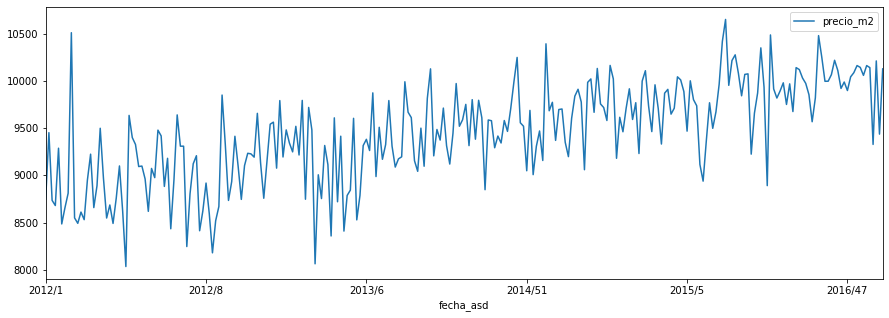

In [39]:
# Se puede ver que hay una tendencia global a las propiedades a aumentar su costo segun los años pero no
# creemos viable el poder inferir que esta correlacionado con el valor del dolar aun. Buscaremos otra alternativa.
selection = df
Q1 = selection["precio_m2"].quantile(0.85)
Q2 = selection["precio_m2"].quantile(0)
filtrado = selection[selection["precio_m2"].apply(lambda x: 
                             True if (Q1 >= x and x >= Q2) else False )]

filtrado.loc[:, 'fecha_asd'] = selection['fecha'].dt.weekofyear.combine(selection['fecha'].dt.year, lambda x,y: f"{y}/{x}")
grouped = filtrado.groupby(['fecha_asd']).agg({'precio_m2':'mean'})
grouped.reset_index(inplace=True)
grouped.plot.line(x='fecha_asd', figsize=(15,5))


In [45]:
# Analizemos visualmente no se encuentran similitudes entre la variacion del costo de los terrenos y 
# la variacion del USD con respecto MXC

dfChangeRate.loc[:, 'año_mes'] = dfChangeRate['Fecha'].dt.weekofyear.combine(dfChangeRate['Fecha'].dt.year, lambda x,y: f"{y}/{x}")
dfChangeRate.set_index('año_mes').tail()


,Fecha,Último
año_mes,,
2012/4,2012-01-29,12.68
2012/3,2012-01-22,12.92
2012/2,2012-01-15,13.18
2012/31,2012-08-01,13.60
2012/52,2012-01-01,13.72
